Emily Wang | GF Baking | MatSci 2016

## Accessing and Plotting the Instron Data Captured
in .csv Format

(See other notebook for the situation with the .csv format)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import numpy as np
import pprint as pp

/home/greenteawarrior/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Compression Tests

#### 1TspPectin (April 11, 2016)

In [2]:
# import
p1tsp_compress1 = pd.read_csv('data/1TspPectin/1TspPectin.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p1tsp_compress2 = pd.read_csv('data/1TspPectin/1TspPectin.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p1tsp_compress3 = pd.read_csv('data/1TspPectin/1TspPectin.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p1tsp_compress4 = pd.read_csv('data/1TspPectin/1TspPectin_1.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p1tsp_compress5 = pd.read_csv('data/1TspPectin/1TspPectin_1.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p1tsp_compress6 = pd.read_csv('data/1TspPectin/1TspPectin_1.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p1tsp_compress7 = pd.read_csv('data/1TspPectin/1TspPectin_2.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p1tsp_compress8 = pd.read_csv('data/1TspPectin/1TspPectin_2.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])

In [3]:
p1tsp_compress1.head()

,Time,Extension,Load
,(sec),(mm),(N)
0,0.00,0.00000,-0.00209
1,0.05,-0.00093,0.00178
2,0.10,-0.00480,-0.00413
3,0.15,-0.01360,-0.00742
4,0.20,-0.02467,-0.01797


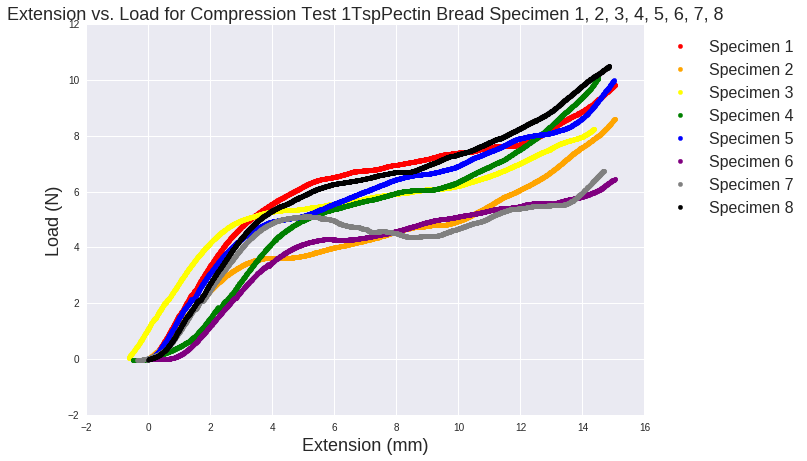

In [4]:
# plotting
pw = plt.figure(figsize=(10,7))
plt.scatter(p1tsp_compress1['Extension'].multiply(-1), p1tsp_compress1['Load'].multiply(-1), color='red')
plt.scatter(p1tsp_compress2['Extension'].multiply(-1), p1tsp_compress2['Load'].multiply(-1), color='orange')
plt.scatter(p1tsp_compress3['Extension'].multiply(-1), p1tsp_compress3['Load'].multiply(-1), color='yellow')
plt.scatter(p1tsp_compress4['Extension'].multiply(-1), p1tsp_compress4['Load'].multiply(-1), color='green')
plt.scatter(p1tsp_compress5['Extension'].multiply(-1), p1tsp_compress5['Load'].multiply(-1), color='blue')
plt.scatter(p1tsp_compress6['Extension'].multiply(-1), p1tsp_compress6['Load'].multiply(-1), color='purple')
plt.scatter(p1tsp_compress7['Extension'].multiply(-1), p1tsp_compress7['Load'].multiply(-1), color='gray')
plt.scatter(p1tsp_compress8['Extension'].multiply(-1), p1tsp_compress8['Load'].multiply(-1), color='black')

# formatting
plt.title('Extension vs. Load for Compression Test 1TspPectin Bread Specimen 1, 2, 3, 4, 5, 6, 7, 8', fontsize=18)
plt.xlabel('Extension (mm)', fontsize=18)
plt.ylabel('Load (N)', fontsize=18)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(['Specimen 1', 
            'Specimen 2', 
            'Specimen 3', 
            'Specimen 4', 
            'Specimen 5', 
            'Specimen 6', 
            'Specimen 7', 
            'Specimen 8'], 
            bbox_to_anchor=(1.01, 1), 
            loc=2, 
            fontsize=16)
plt.show()

# uncomment if figure saving is desired
# pw.savefig('figures/1TspPectin_Compression_Sp12345678.pdf', format='pdf')
# pw.savefig('figures/1TspPectin_Compression_Sp12345678.png', format='png')

### Helper function for plotting the compression test data for a given loaf's experiments :)

In [5]:
def plot_cc(dataframes, expname, save=False, filename="cc_figure", mode='Compression', num_specimen=8):
    # dataframes: list of dataframes desired to plot
    # expname: string of the experiment name (1Tsp Pectin, 7PercentGluten, Xanthan Gum, etc. This is for the plot title.
    # save: True or False -- specify whether or not you want to save the figure
    # filename for the figure (it's saved as a png in the figures folder)
    
    # plotting
    pw = plt.figure(figsize=(10,7))
     
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gray', 'black', 'magenta', 'cyan']
    for i in range(len(dataframes)):
        plt.scatter(dataframes[i]['Extension'].multiply(-1), dataframes[i]['Load'].multiply(-1), color=colors[i])
        
    specimens_str = 'Specimen '
    for i in range(1, num_specimen + 1):
        if i != num_specimen:
            specimens_str += str(i) + ', '
        if i == num_specimen:
            specimens_str += str(i)

    # formatting
    plt.title('Extension vs. Load for %s Test %s Bread Specimen %s' % (mode, expname, specimens_str), fontsize=18)
    plt.xlabel('Extension (mm)', fontsize=18)
    plt.ylabel('Load (N)', fontsize=18)
    plt.rc('xtick', labelsize=15) 
    plt.rc('ytick', labelsize=15) 
    
    axes = plt.gca()
    if mode == 'compression':
        axes.set_xlim([-16,2])
        axes.set_ylim([-12,2])
    
    plt.legend(['Specimen 1', 
                'Specimen 2', 
                'Specimen 3', 
                'Specimen 4', 
                'Specimen 5', 
                'Specimen 6', 
                'Specimen 7', 
                'Specimen 8'], 
                bbox_to_anchor=(1.01, 1), 
                loc=2, 
                fontsize=16)    
    plt.show()
    
    # saving the file
    if save:
        pw.savefig("figures/%s.png" % filename, format='png')

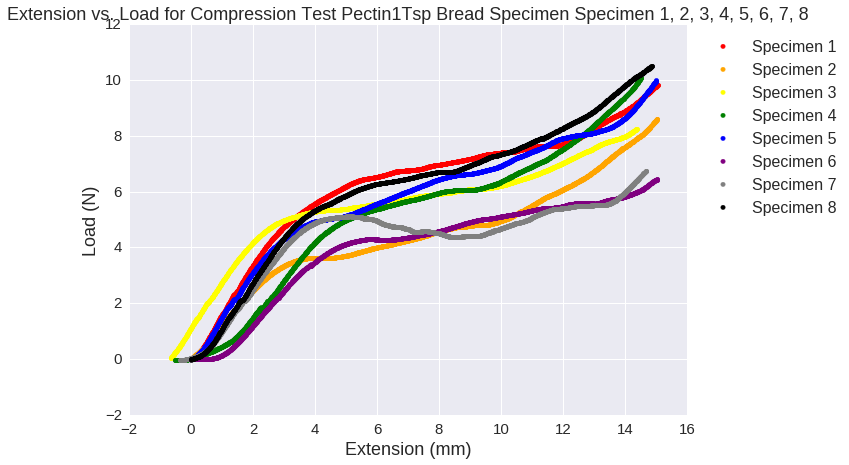

In [6]:
plot_cc([p1tsp_compress1, 
         p1tsp_compress2, 
         p1tsp_compress3,
         p1tsp_compress4,
         p1tsp_compress5, 
         p1tsp_compress6, 
         p1tsp_compress7, 
         p1tsp_compress8], 
         'Pectin1Tsp', 
         True, 
         '1TspPectin_Sp12345678')

#### 3TspPectin (also April 11, 2016)

In [7]:
# import
p3tsp_compress1 = pd.read_csv('data/3TspPectin/3TspPectin.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p3tsp_compress2 = pd.read_csv('data/3TspPectin/3TspPectin.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p3tsp_compress3 = pd.read_csv('data/3TspPectin/3TspPectin.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p3tsp_compress4 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
p3tsp_compress5 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
p3tsp_compress6 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
p3tsp_compress7 = pd.read_csv('data/3TspPectin/3TspPectin_1.is_comp_RawData/Specimen_RawData_4.csv', header=[0,1])

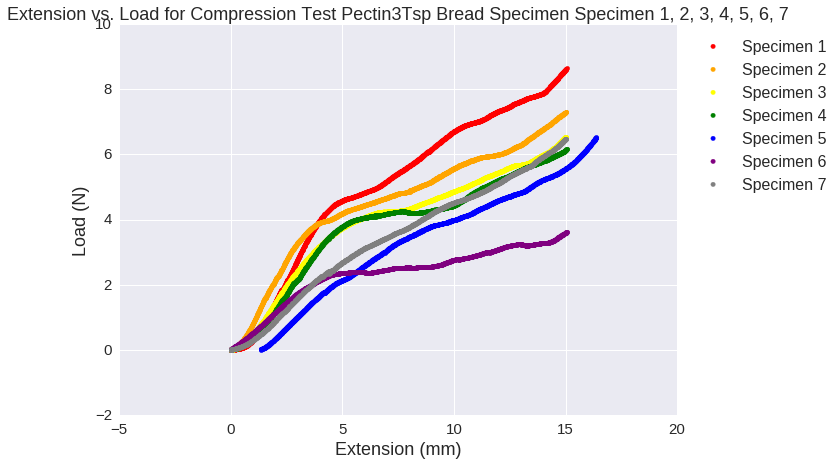

In [8]:
plot_cc([p3tsp_compress1, 
         p3tsp_compress2, 
         p3tsp_compress3,
         p3tsp_compress4,
         p3tsp_compress5, 
         p3tsp_compress6, 
         p3tsp_compress7], 
         'Pectin3Tsp', 
         True, 
         '3TspPectin_Sp1234567', 
         num_specimen=7)

#### Second trial of 13PercentGluten (April 18, 2016)

In [9]:
# import
g2_13_compress1 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
g2_13_compress2 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
g2_13_compress3 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
g2_13_compress4 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_4.csv', header=[0,1])
g2_13_compress5 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_5.csv', header=[0,1])
g2_13_compress6 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_6.csv', header=[0,1])
g2_13_compress7 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_7.csv', header=[0,1])
g2_13_compress8 = pd.read_csv('data/2_13PercentGluten/2_13gluten_Compression.is_comp_RawData/Specimen_RawData_8.csv', header=[0,1])

In [10]:
# TODO: determine whether sample 5 data has an offset that we should account for
display(g2_13_compress5.head())

,Time,Extension,Load
,(sec),(mm),(N)
0,0.00,-0.00027,-1.02753
1,0.05,-0.00133,-1.02622
2,0.10,-0.00573,-1.03442
3,0.15,-0.01493,-1.05162
4,0.20,-0.02547,-1.08209


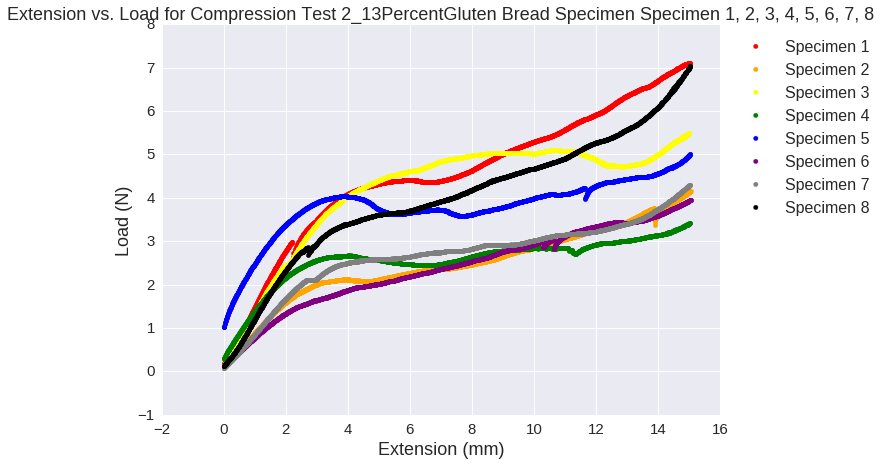

In [11]:
plot_cc([g2_13_compress1, 
         g2_13_compress2, 
         g2_13_compress3,
         g2_13_compress4,
         g2_13_compress5, 
         g2_13_compress6, 
         g2_13_compress7,
         g2_13_compress8], 
         '2_13PercentGluten', 
         True, 
         '2_13PercentGluten_Sp12345678')

#### Second trial of 13PercentGluten (April 18, 2016)

In [12]:
# import
g2_8_compress1 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
g2_8_compress2 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
g2_8_compress3 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
g2_8_compress4 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_1.csv', header=[0,1])
g2_8_compress5 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_2.csv', header=[0,1])
g2_8_compress6 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_3.csv', header=[0,1])
g2_8_compress7 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_4.csv', header=[0,1])
g2_8_compress8 = pd.read_csv('data/2_8PercentGluten/2_8gluten_Compression_Continued.is_comp_RawData/Specimen_RawData_5.csv', header=[0,1])

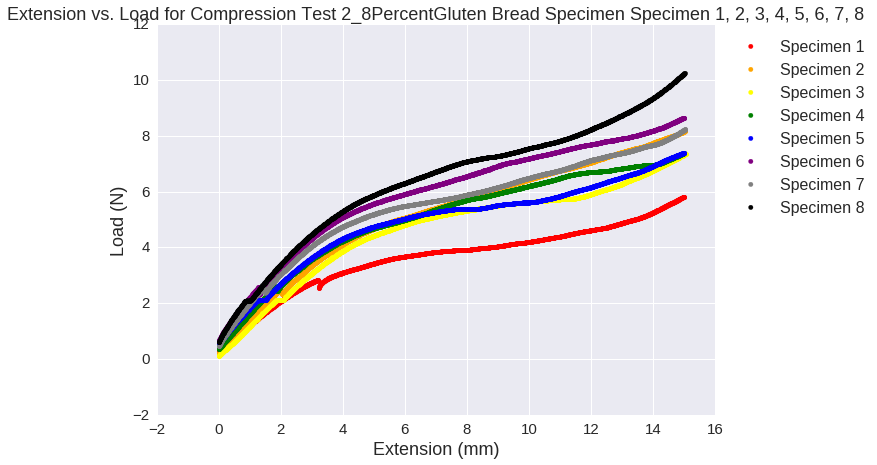

In [13]:
plot_cc([g2_8_compress1, 
         g2_8_compress2, 
         g2_8_compress3,
         g2_8_compress4,
         g2_8_compress5, 
         g2_8_compress6, 
         g2_8_compress7,
         g2_8_compress8], 
         '2_8PercentGluten', 
         True, 
         '2_8PercentGluten_Sp12345678')

### XG Bend Tests (Specimen 1, 2, 3)

Data taken on March 24, 2016

In [14]:
# import
XG_bend1 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_1.csv', header=[0, 1])
XG_bend2 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_2.csv', header=[0, 1])
XG_bend3 = pd.read_csv('data/XG/XG_Bend_Data/XG_Bend_Specimen_RawData_3.csv', header=[0, 1])

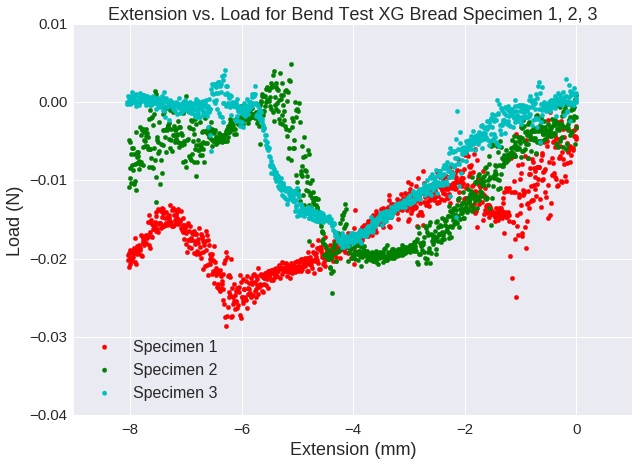

In [15]:
# plotting
pw = plt.figure(figsize=(10,7))
plt.scatter(XG_bend1['Extension'], XG_bend1['Load'], color='r')
plt.scatter(XG_bend2['Extension'], XG_bend2['Load'], color='g')
plt.scatter(XG_bend3['Extension'], XG_bend3['Load'], color='c')

# formatting
plt.title('Extension vs. Load for Bend Test XG Bread Specimen 1, 2, 3', fontsize=18)
plt.xlabel('Extension (mm)', fontsize=18)
plt.ylabel('Load (N)', fontsize=18)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(['Specimen 1', 'Specimen 2', 'Specimen 3'], loc=3, fontsize=16)
plt.show()

# uncomment if figure saving is desired
# pw.savefig('figures/XG_Bend_Sp123.pdf', format='pdf')
# pw.savefig('figures/XG_Bend_Sp123.png', format='png')

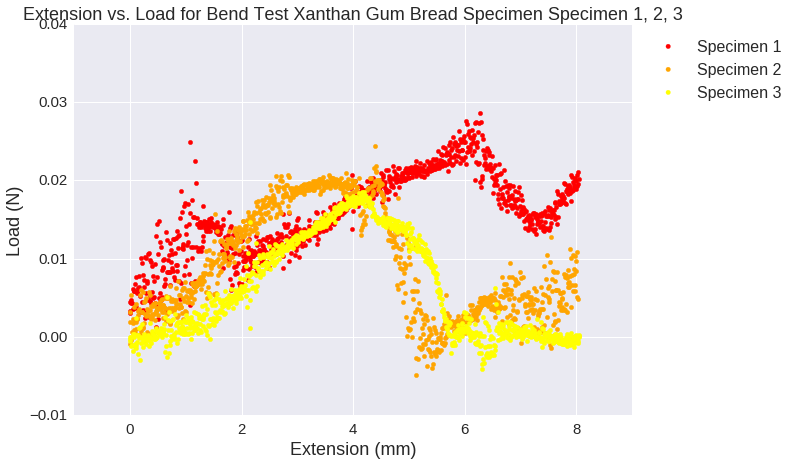

In [16]:
# using the helper function

plot_cc([XG_bend1, 
         XG_bend2, 
         XG_bend3], 
         'Xanthan Gum', 
         True, 
         'XG_bend_Sp123',
         num_specimen = 3,
         mode = 'Bend')

Elizabeth's comment: Specimen 1 didn't break, so that's why its curve is a significantly different shape than Specimen 2 and 3's.

Further calculations and graphs for the bend tests TBD.